# Data Visualization
Let's look at the data going into the meta-analysis, that is, the unthresholded group-level statistical maps (z-maps) for each of the analysis teams.

In [1]:
%matplotlib inline
import functions as fun
from nistats import thresholding
import numpy as np
import nibabel as nib
import nilearn
from nilearn import masking, plotting

template = nilearn.datasets.load_mni152_template()
affine = template.affine

# brain coordinates for plotting
cut_coords=None

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/importlib/_bootstrap_external.py:922: FutureWarning: Module nipy.labs.utils.routines deprecated, will be removed
  _imp.create_dynamic, spec)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nipy/labs/statistical_mapping.py:15: FutureWarning: Module nipy.labs.glm deprecated, will be removed. Please use nipy.modalities.fmri.glm instead.
  from .glm import glm
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nipy/labs/statistical_mapping.py:16: FutureWarning: Module nipy.labs.group deprecated, will be removed
  from .group.permutation_test import \


191028-21:28:58,171 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.2.3)


INFO:nipype.utils:Running nipype version 1.2.3 (latest: 1.2.3)


Get the paths for the unthresholded image for each analysis team, for the given hypothesis.

In [2]:
input_dir = '../data-narps/proc/'
img_paths = fun.get_data_paths(input_dir)

For now, select the first N studies. 

In [3]:
# N_img = 3
# img_paths = img_paths[:N_img]

In order to imitate how a real study is done, we should calculate the z-thresholds corrected for multiple comparisons.

In [4]:
level = .05
height_control = 'fdr'
cluster_threshold = 1
fdr_thresholds = [thresholding.map_threshold(path, level=.05, height_control='fdr')[1] \
                  for path in img_paths]

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


Gather the activation peaks from the images that are FDR-thresholded. 

In [5]:
activation_peaks = [fun.get_activations(path, fdr_thresholds[n_path], space='ijk') \
                    for n_path, path in enumerate(img_paths)]

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


Store the peaks in a binary image so that we can visualize them on a brain map.

In [6]:
binary_peak_imgs = [fun.peaks_to_binary_image(I, J, K) \
                    for I, J, K in activation_peaks]

In [12]:
I, J, K = [], [], []
if not(I, J, K):
    print('empty')

### Visualize the raw z-maps, thersholded z-maps, and peak activations
Note that the 'raw' maps actually aren'y completely raw, since there's a small threshold so that the template isn't visible. 

/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:62: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/opt/miniconda-latest/envs/neuro_py36/lib/python3.6/site-packages/nilearn/plotting/displays.py:591: RuntimeWarning: More than 20 figures have been opened. Figure

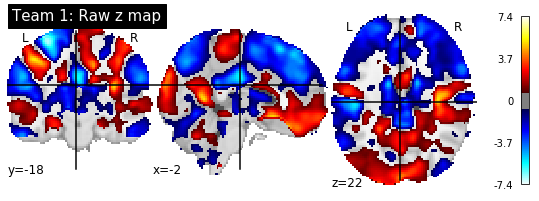

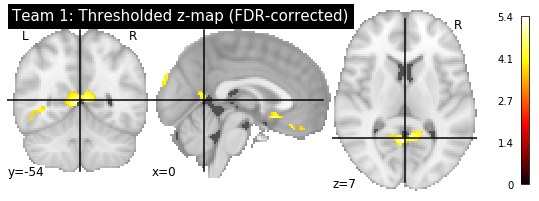

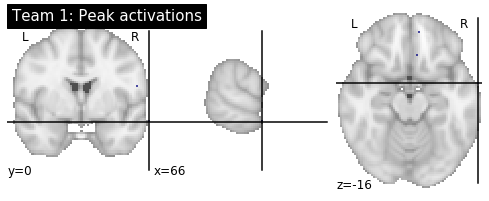

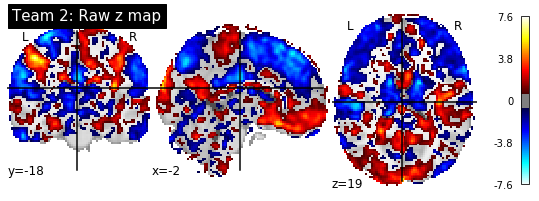

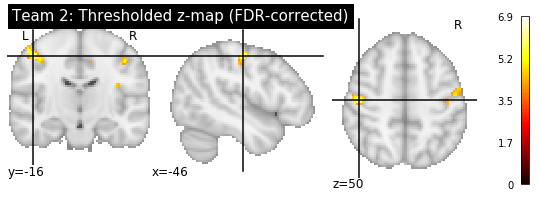

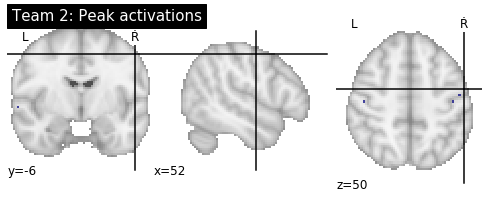

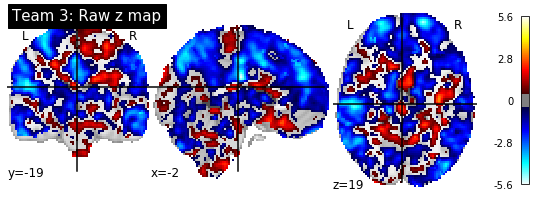

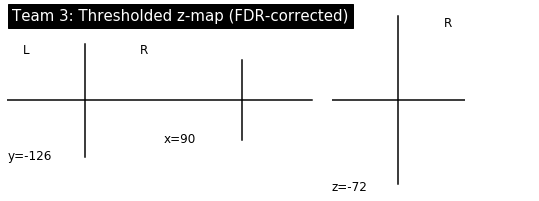

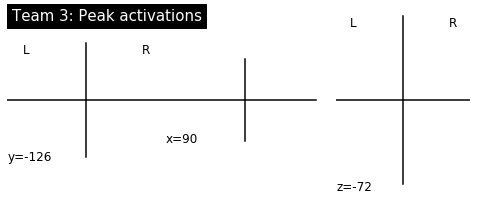

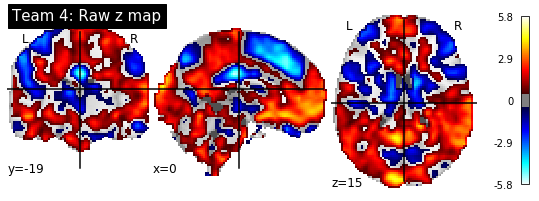

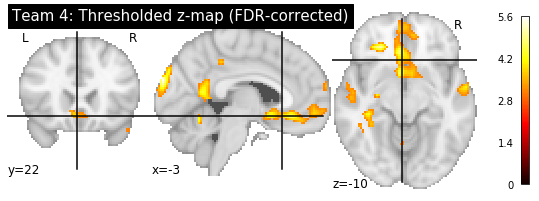

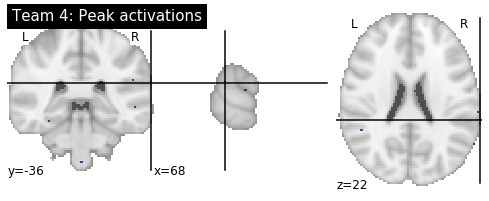

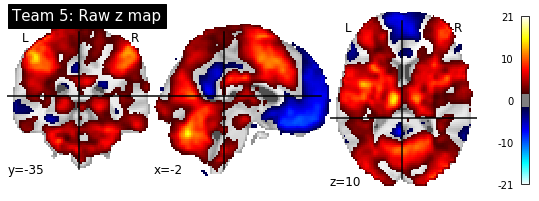

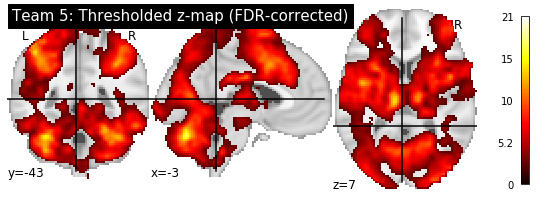

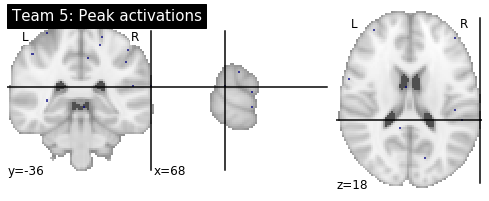

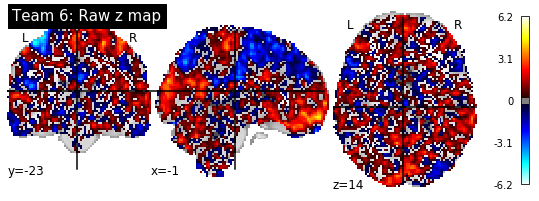

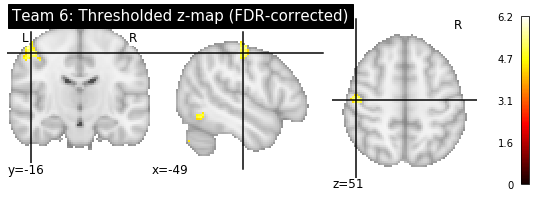

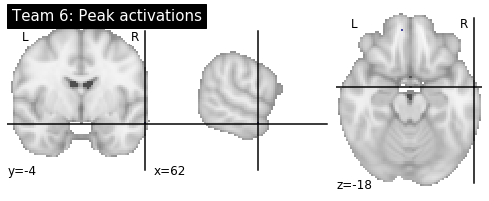

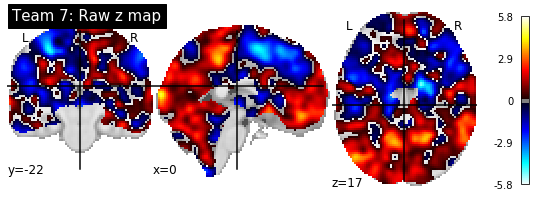

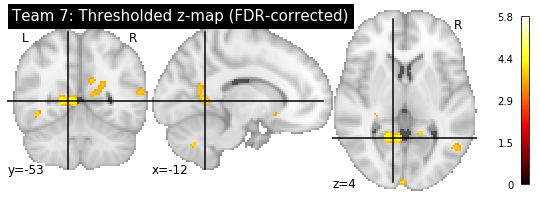

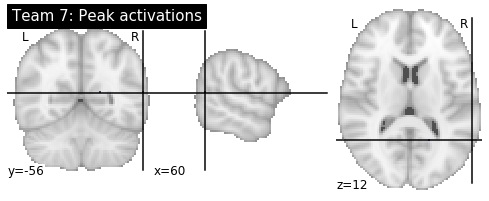

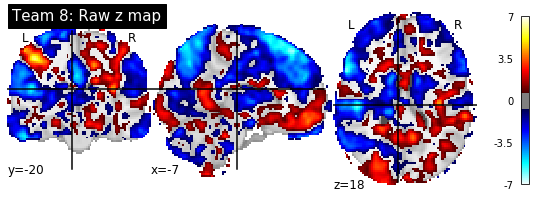

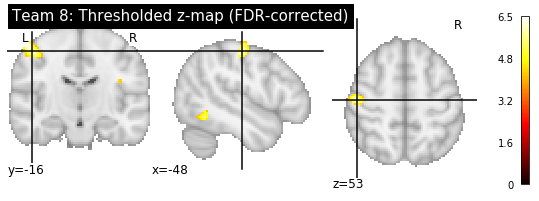

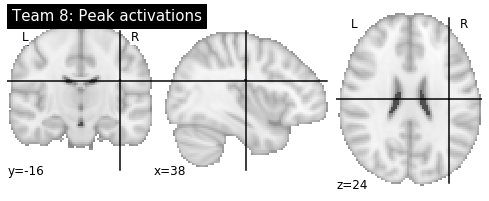

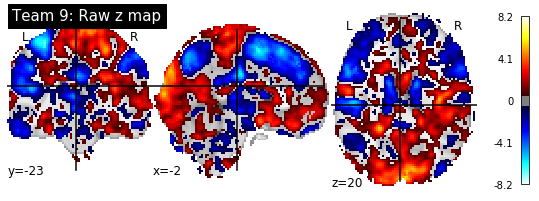

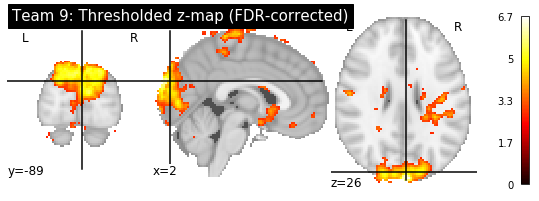

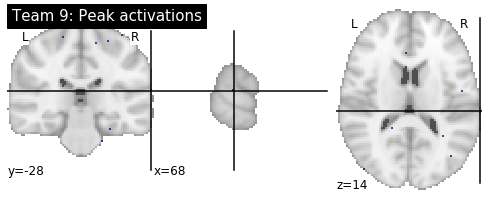

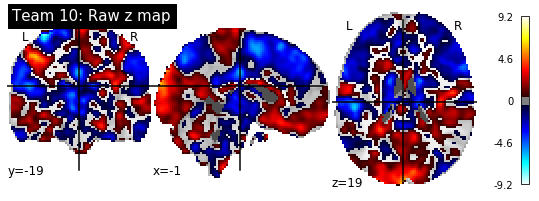

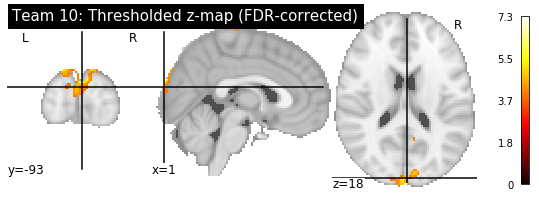

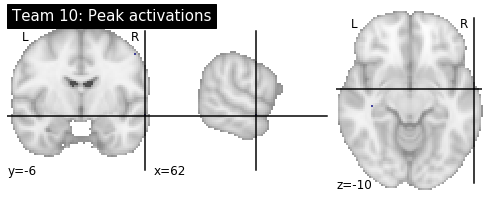

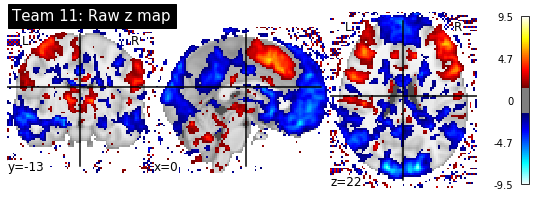

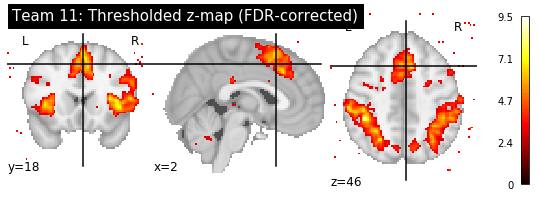

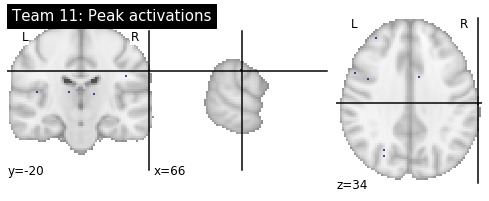

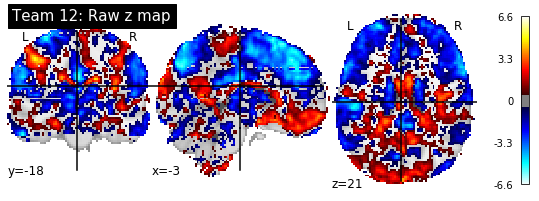

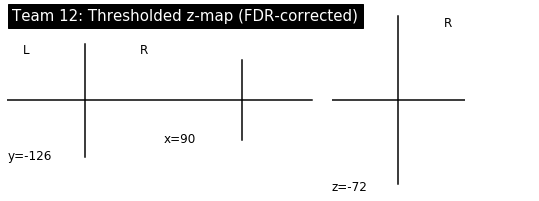

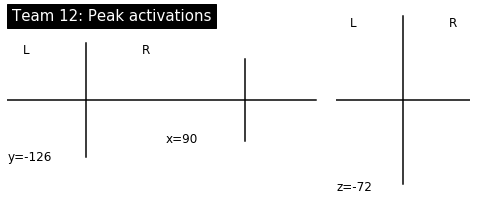

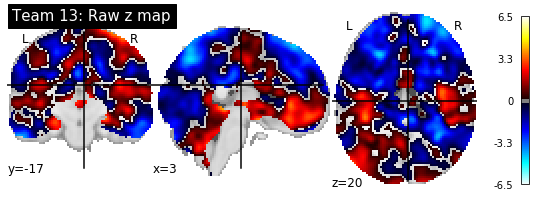

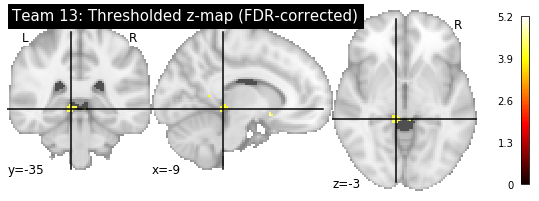

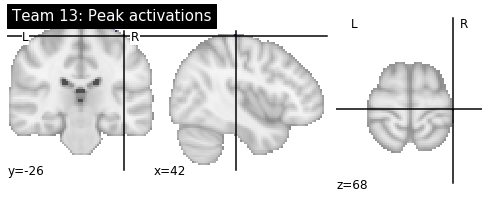

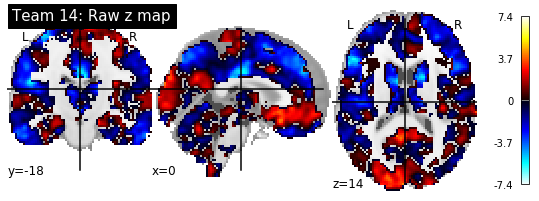

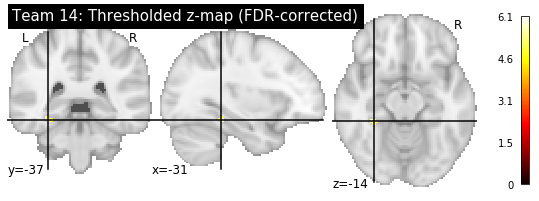

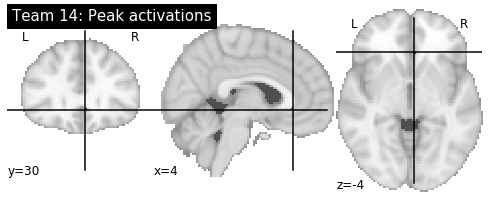

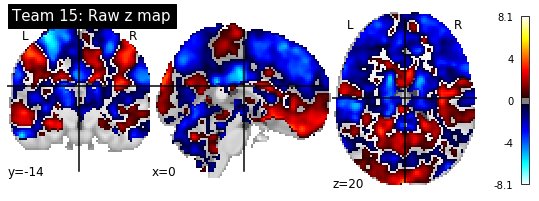

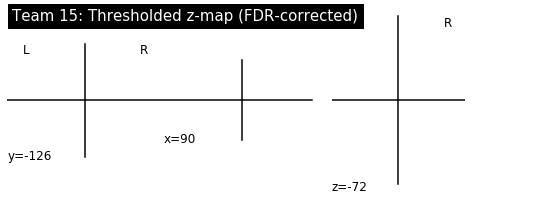

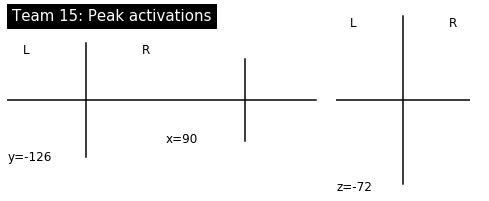

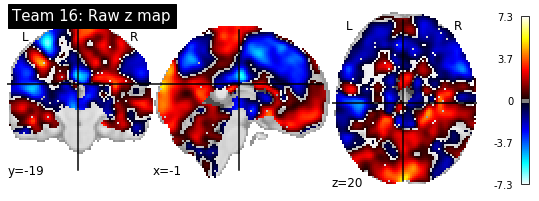

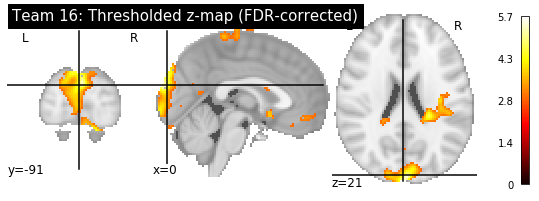

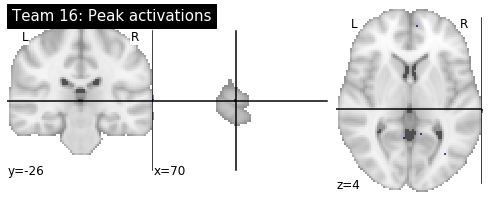

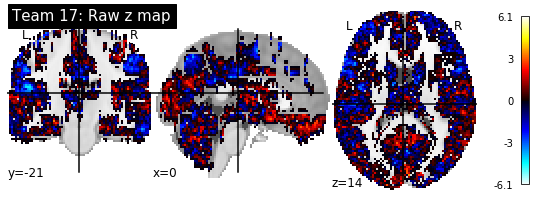

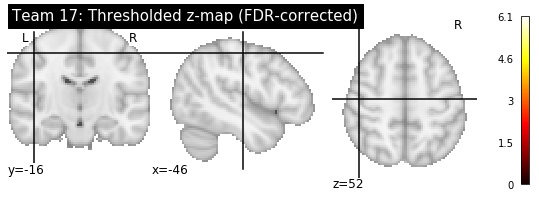

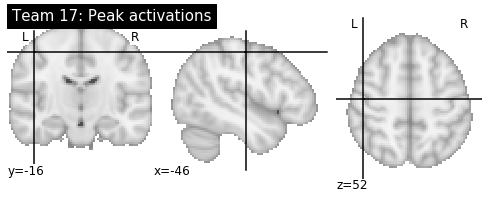

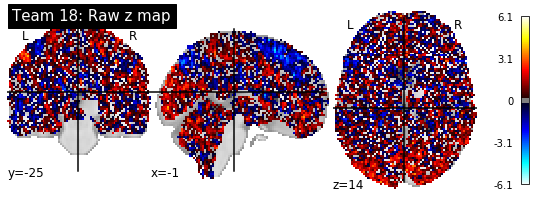

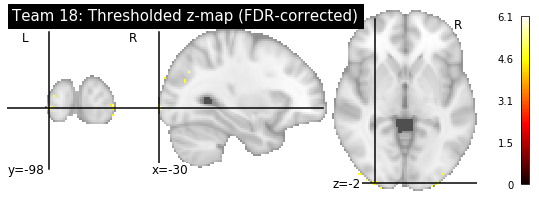

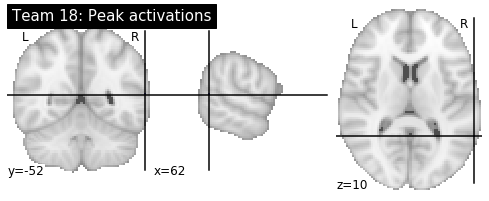

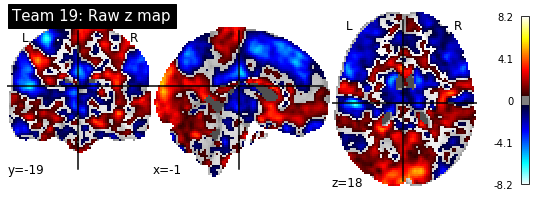

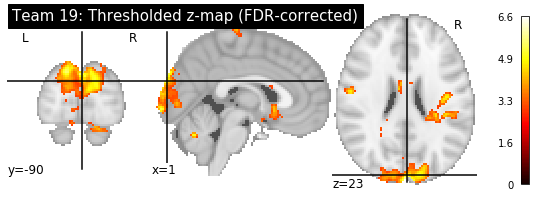

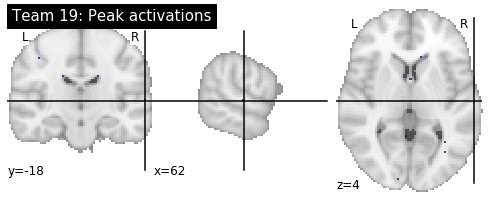

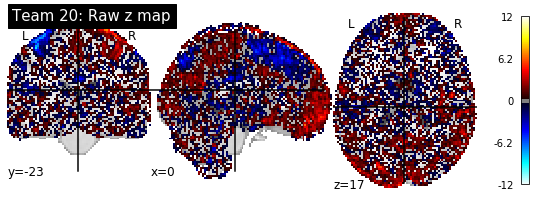

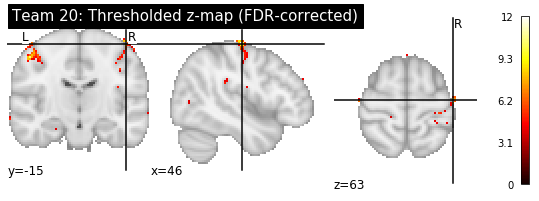

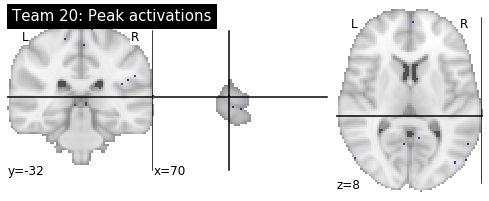

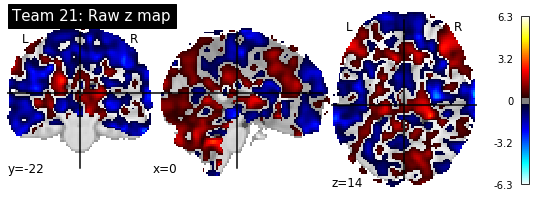

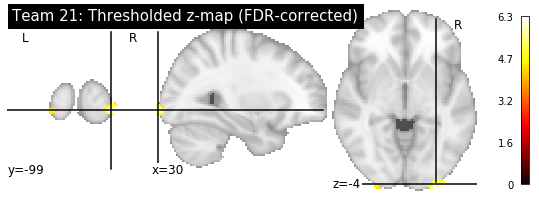

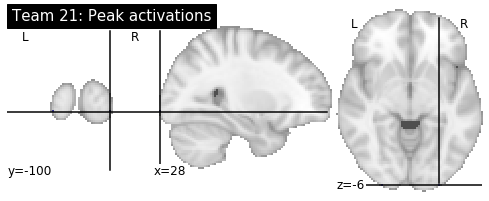

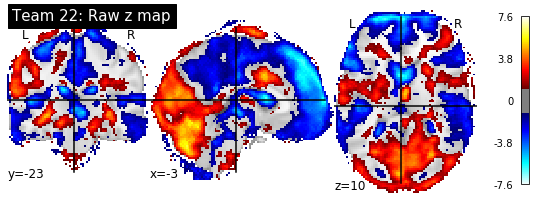

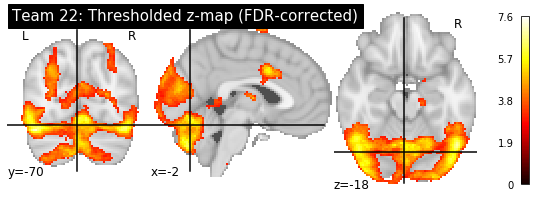

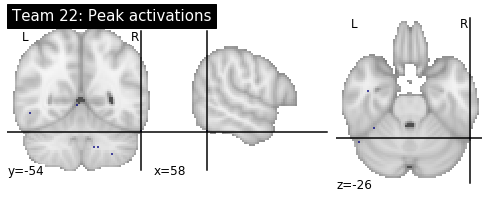

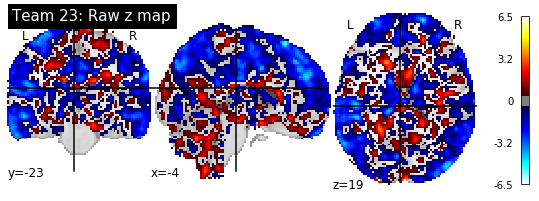

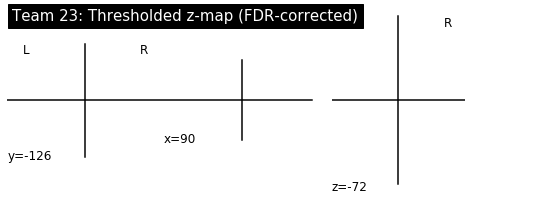

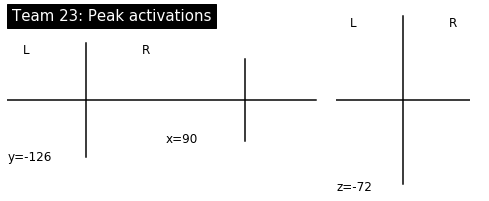

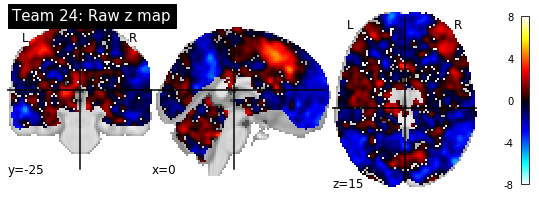

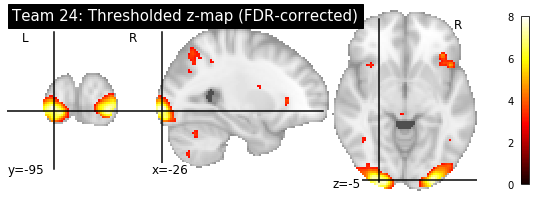

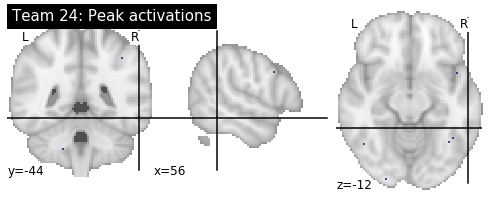

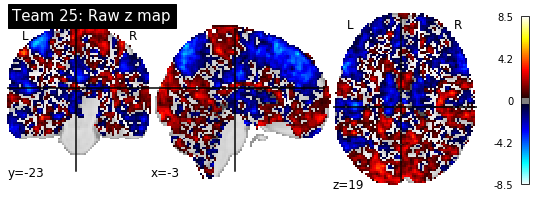

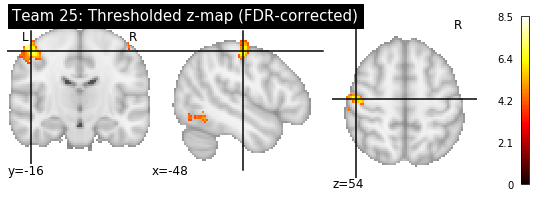

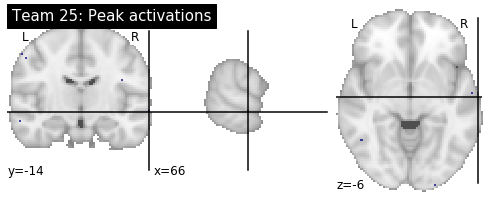

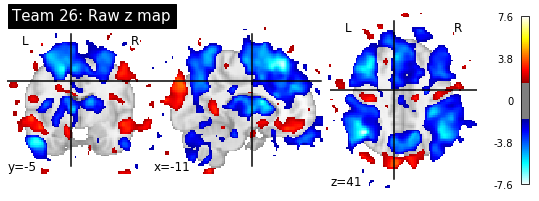

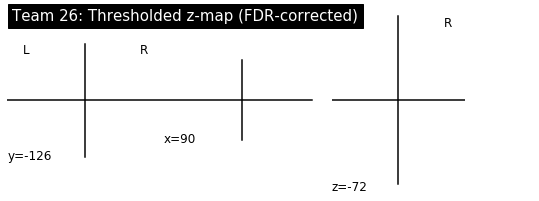

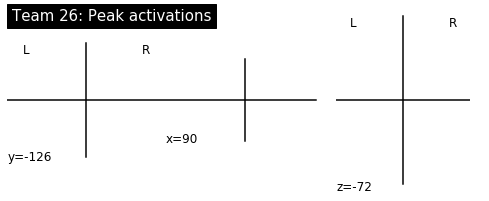

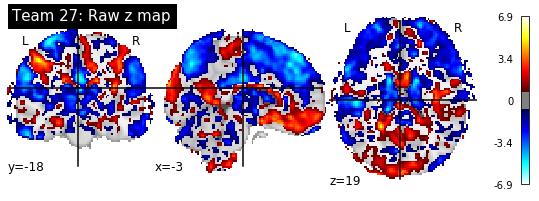

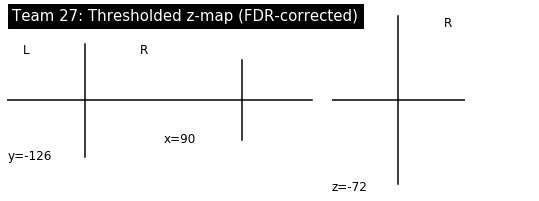

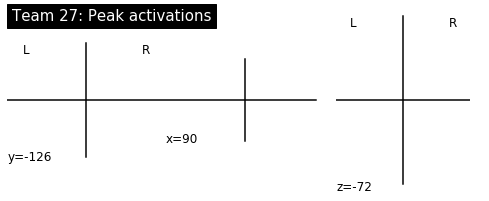

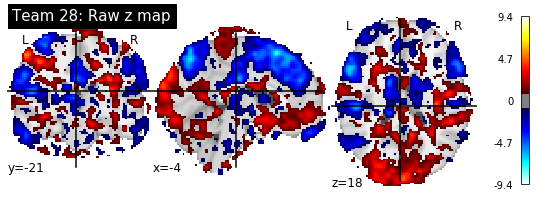

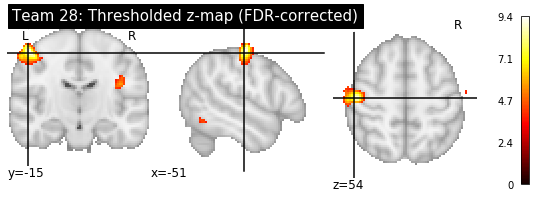

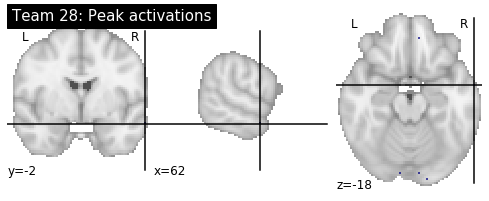

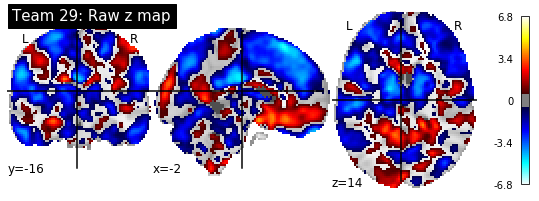

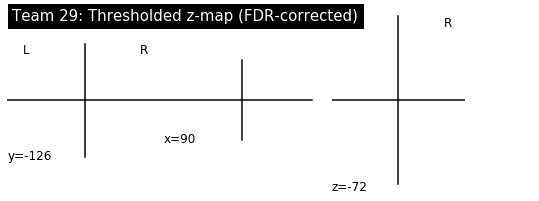

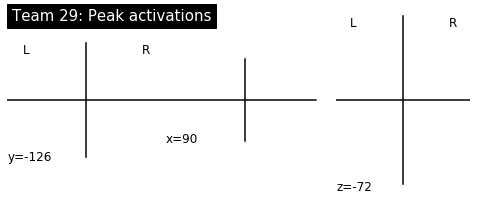

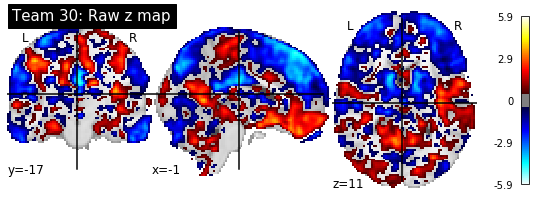

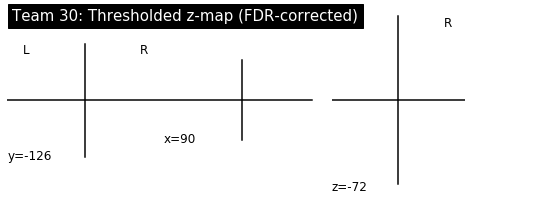

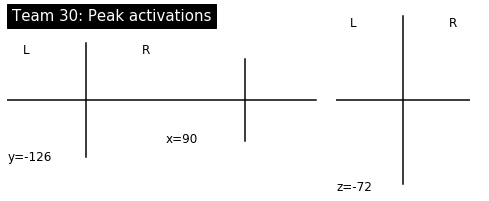

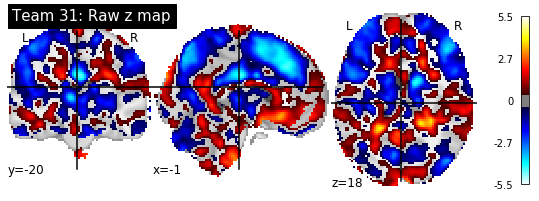

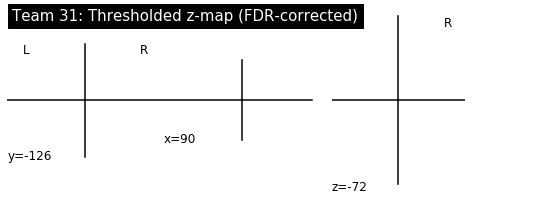

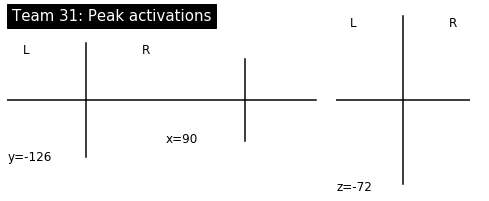

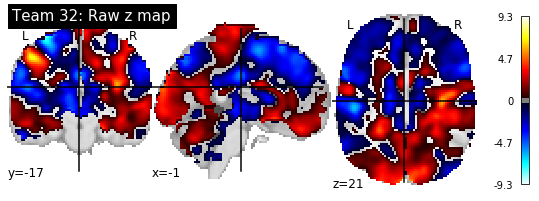

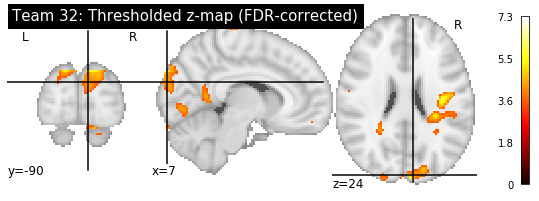

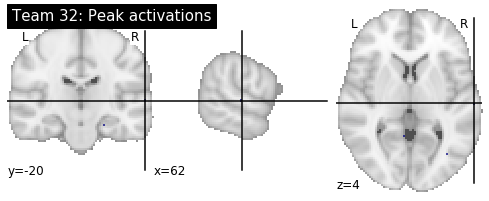

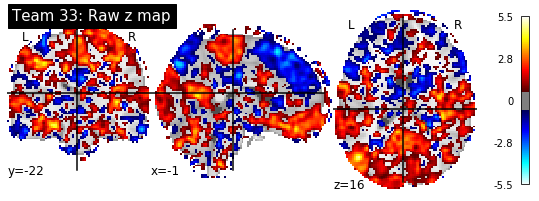

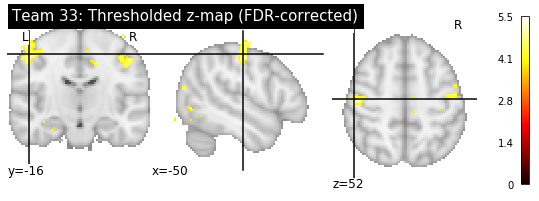

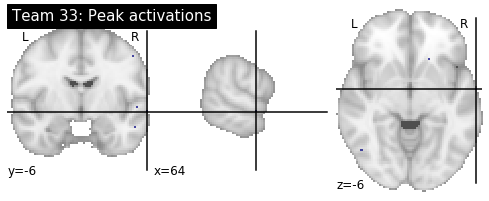

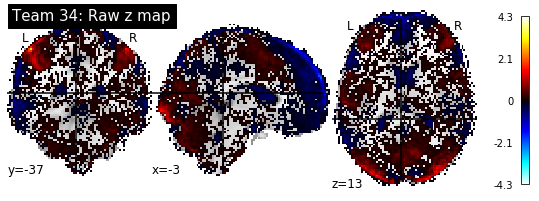

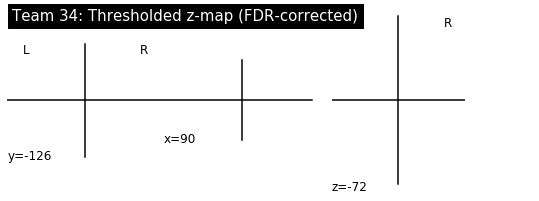

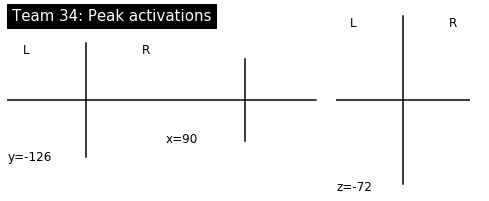

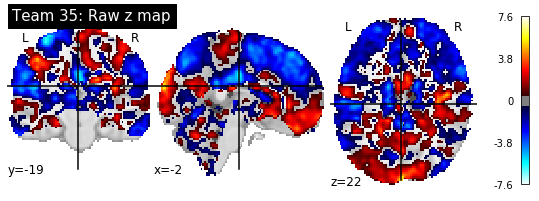

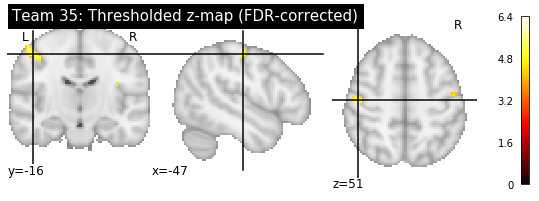

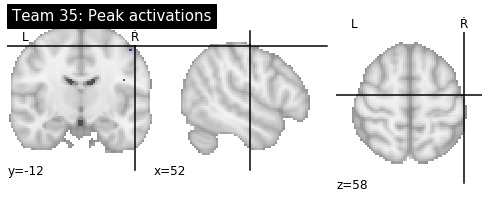

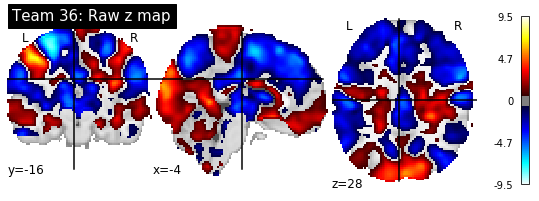

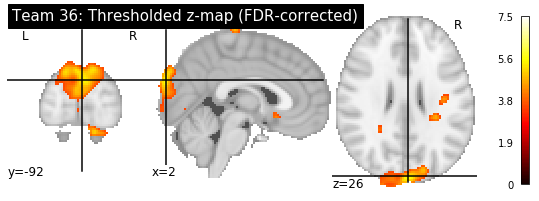

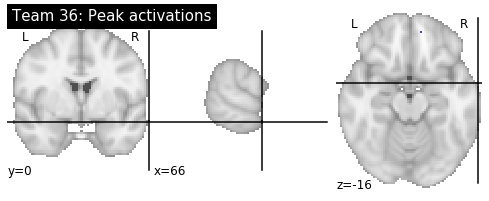

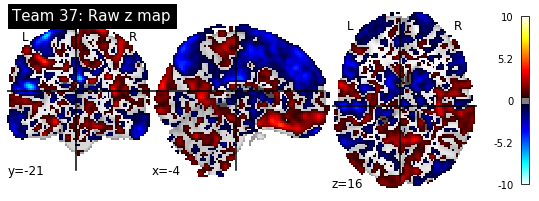

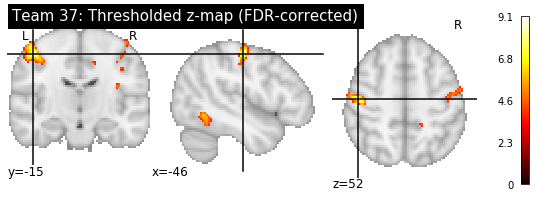

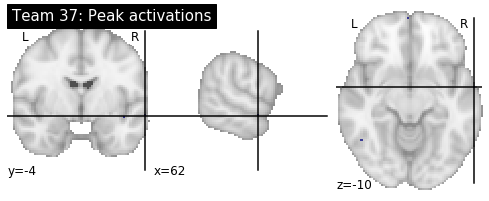

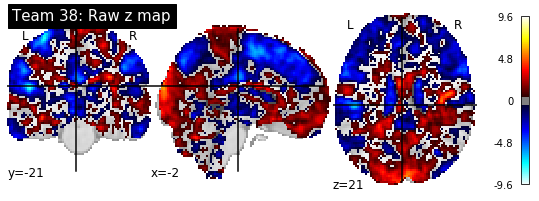

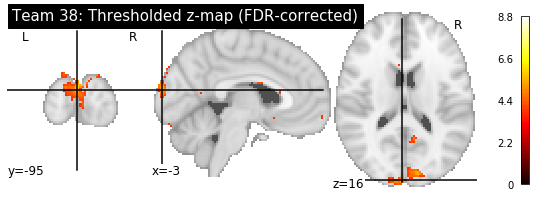

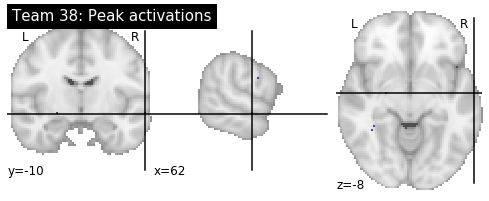

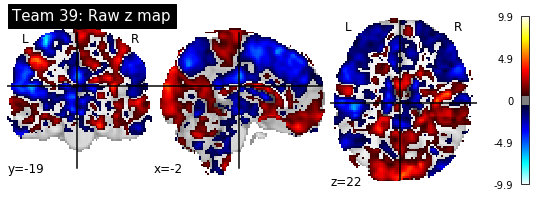

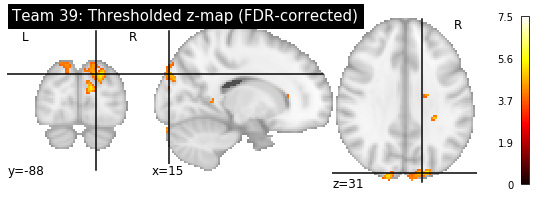

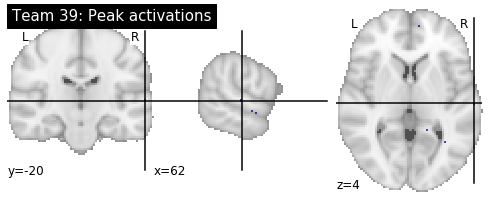

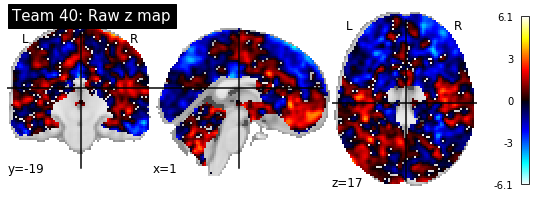

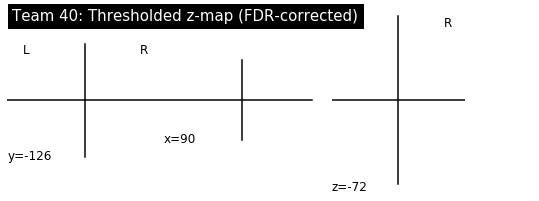

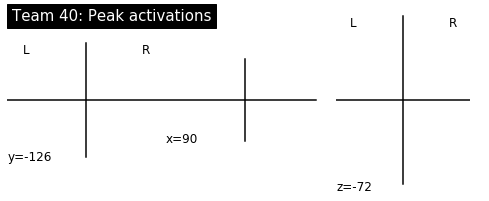

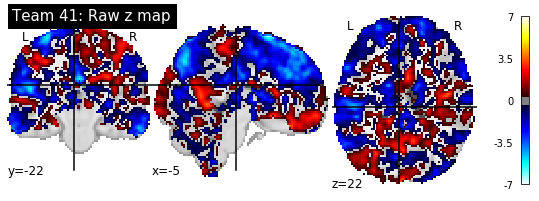

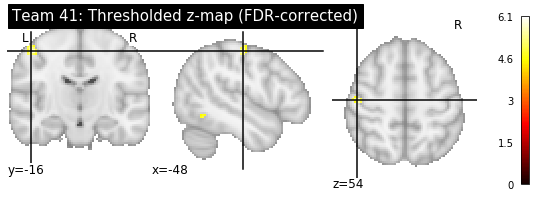

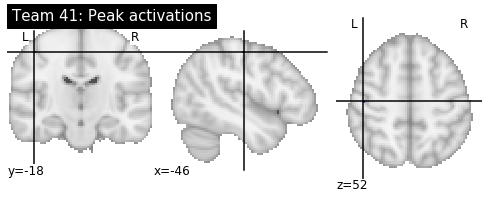

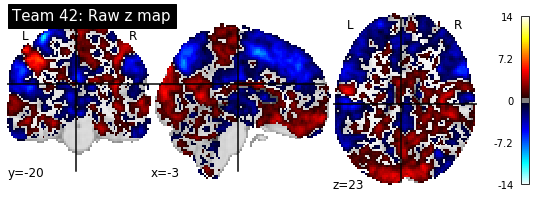

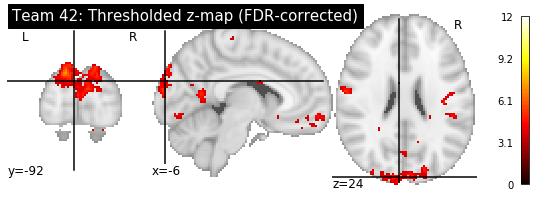

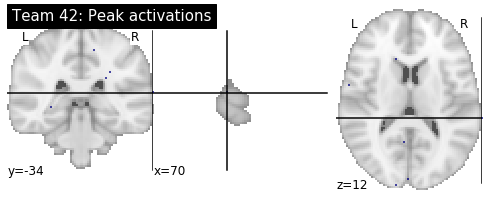

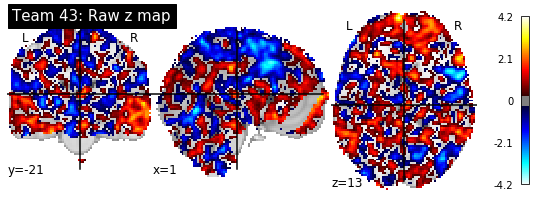

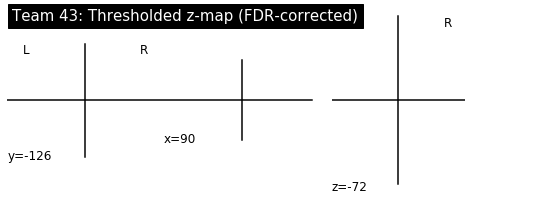

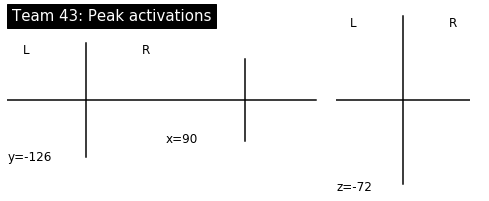

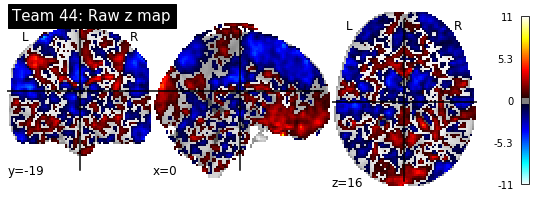

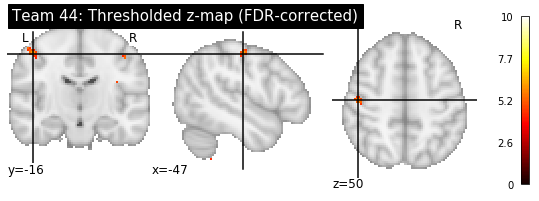

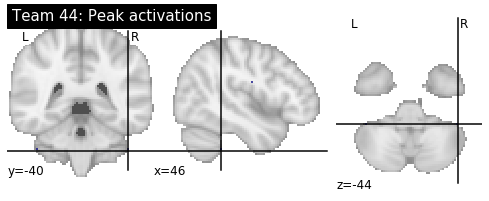

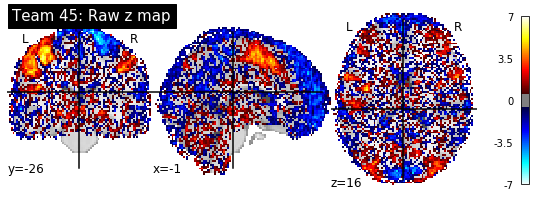

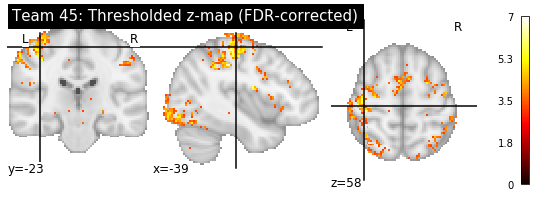

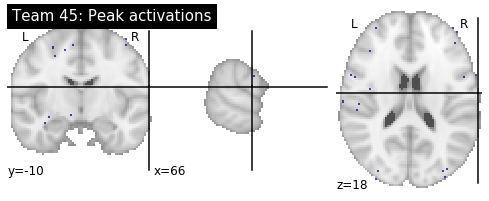

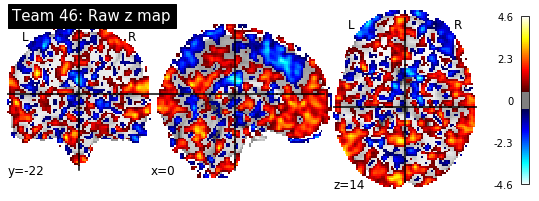

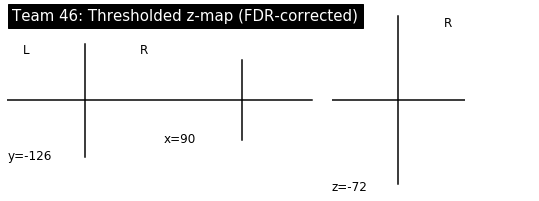

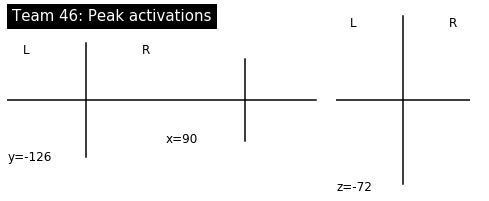

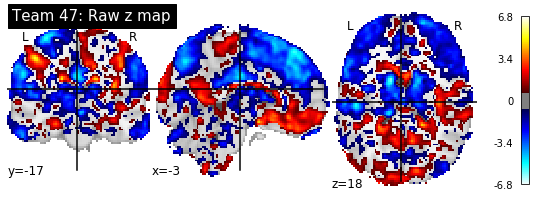

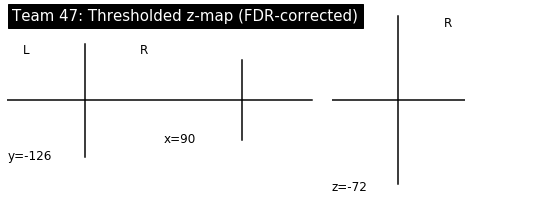

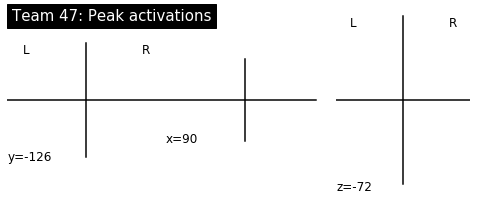

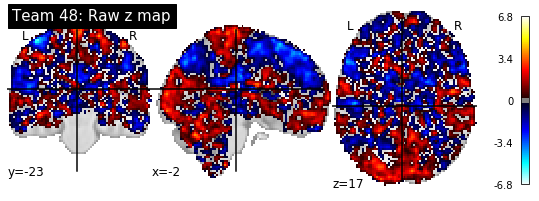

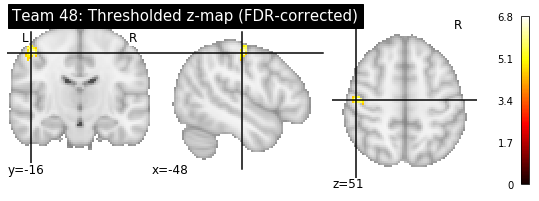

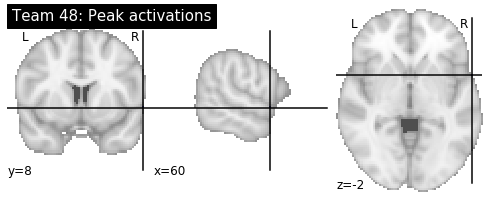

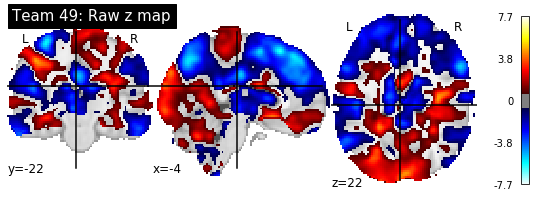

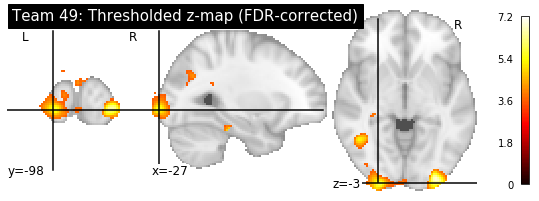

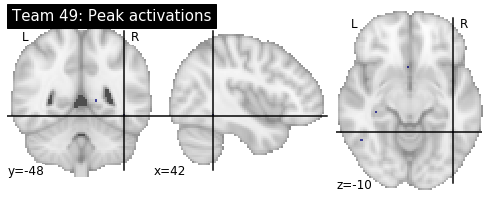

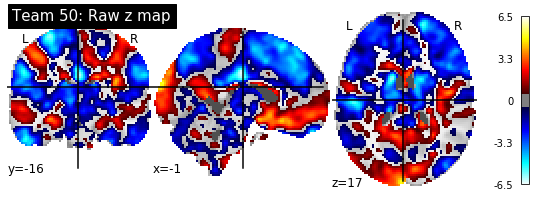

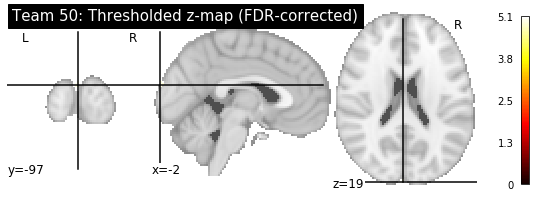

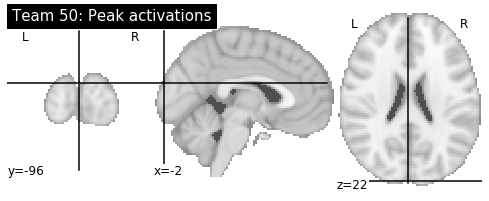

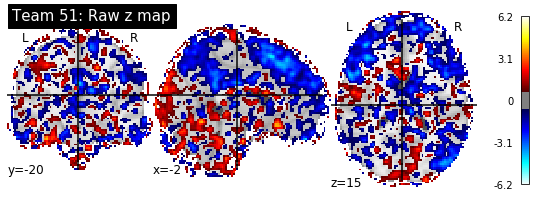

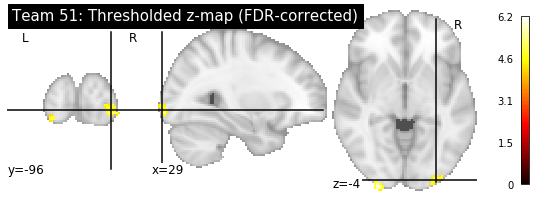

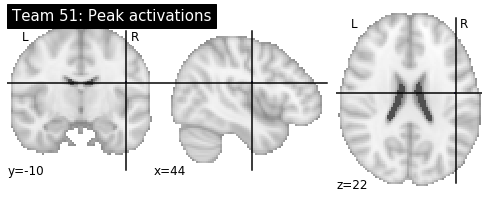

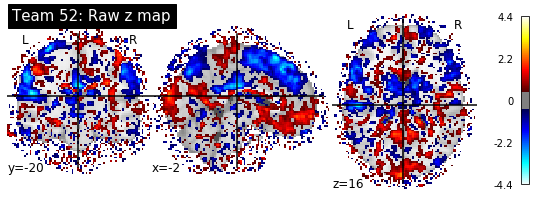

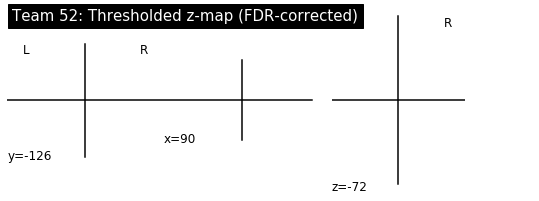

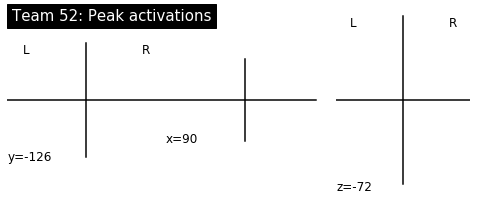

In [7]:
for n_study in range(len(img_paths)):
    # Raw z-map
    z_map = img_paths[n_study]
    plotting.plot_stat_map(z_map, cut_coords=cut_coords, threshold='auto', title='Team %d: Raw z map' %(n_study+1))

    # Thresholded z-map (FDR-corrected)
    thresholded_map, threshold = thresholding.map_threshold(z_map, level=level, 
                       height_control=height_control, cluster_threshold=cluster_threshold)
                                                    
    plotting.plot_stat_map(thresholded_map, cut_coords=cut_coords,\
                           title='Team %d: Thresholded z-map (FDR-corrected)' %(n_study+1))    
    
    # Peak activation map
    plotting.plot_roi(binary_peak_imgs[n_study], cut_coords=cut_coords,\
                      title='Team %d: Peak activations' %(n_study+1))
    